In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("D:/Users/Vipra Nagaich/Downloads/Customers.csv")
products = pd.read_csv("D:/Users/Vipra Nagaich/Downloads/Products.csv")
transactions = pd.read_csv("D:/Users/Vipra Nagaich/Downloads/Transactions.csv")

label_encoder = LabelEncoder()

customers['Region_Encoded'] = label_encoder.fit_transform(customers['Region'])
products['Category_Encoded'] = label_encoder.fit_transform(products['Category'])
# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Feature engineering
merged_data['TotalSpent'] = merged_data.groupby('CustomerID')['TotalValue'].transform('sum')
merged_data['PurchaseFrequency'] = merged_data.groupby('CustomerID')['TransactionID'].transform('count')
merged_data['AvgTransactionValue'] = merged_data['TotalSpent'] / merged_data['PurchaseFrequency']
merged_data['Recency'] = (pd.to_datetime('today') - pd.to_datetime(merged_data['TransactionDate'])).dt.days



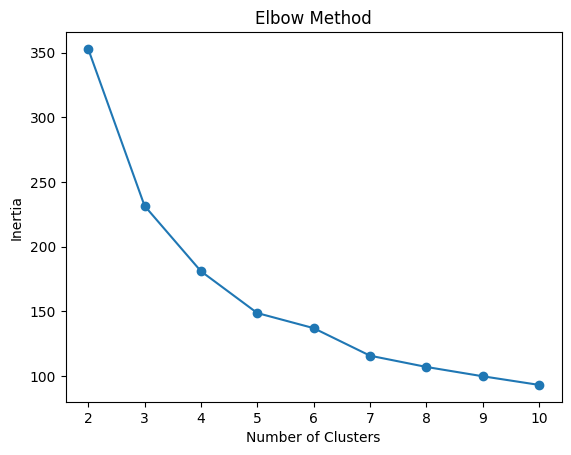

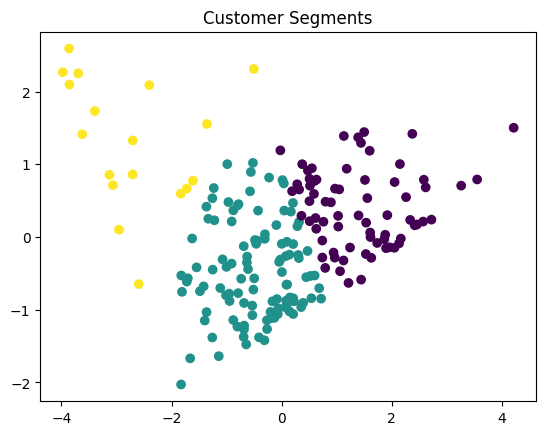

DB Index: 0.880153375840541


In [ ]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['Recency'] = (merged_data['TransactionDate'].max() - merged_data['TransactionDate']).dt.days

# Aggregate customer-level data
customer_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',   # Total spending
    'TransactionID': 'count',   # Frequency
    'Recency': 'min'  # Recency
}).rename(columns={'Price': 'TotalSpending', 'TransactionID': 'Frequency'})

customer_data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)


db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
db_index

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.show()

print("DB Index:", db_index)
